# Einführung in die Programmierung für Studierende der Physik
# (Introduction to Programming for Physicists)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Sommersemester 2025)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 22.12.2024

<H1>Das periodisch angetriebene Pendel</H1>

<p>
Das <i>periodisch angetriebenes Pendel</i> ist ein Anwendungsfall aus der klassischen Mechanik (siehe z.B. Walter Greiner, 'Klassische Mechanik II' [8. Auflage, 2008, Kapitel VII27. Seite 496]). Das System besteht aus einem Pendel, auf welches zus&auml;tzlich eine &auml;u&szlig;ere Kraft mit periodischer Zeitabh&auml;ngigkeit wirkt. Au&szlig;erdem soll das Pendel durch eine geschwindigkeitsabh&auml;ngige Luftreibung ged&auml;mpft sein. Die zugrundeliegende Differentialgleichung besitzt die folgende Form

\begin{equation}
\frac{d^2 \theta(t)}{dt^2} + \frac{\beta}{m} \frac{d \theta(t)}{dt} + \frac{g}{l} \cdot \hbox{sin}\left( \theta(t) \right) = A \cdot \hbox{cos}\left( \Omega \cdot t \right) \quad ,
\end{equation}

wobei $m$ und $l$ die Masse und L&auml;nge des Pendels, $\beta$ der Stokessche Reibungskoeffizient und $A$ und $\Omega$ die Amplitude und Frequenz der &auml;u&szlig;eren Kraft ist. Die zugrundeliegende Bewegungsgleichung des periodisch angetriebenen Pendels ist stark nichtlinear und die, nur auf numerischem Weg zu berechnenden L&ouml;sungen, zeigen deterministisch chaotische Bewegungen.
</p>

<H2>Numerische Lösung des Problems</H2>

<p>
Näheres zum numerischen Lösen von Differentialgleichungen finden Sie in der Vorlesung <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/index.html#V9" target="_blank">Einführung in die Programmierung für Studierende der Physik</A> (Sommersemester 2025), speziell in Vorlesung 9 <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/V9/DGL_2.html" target="_blank">Systeme von gekoppelten Differentialgleichungen und Differentialgleichungen zweiter Ordnung</A> und in dem Jupyter Notebook <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/2025/DGL_2.html" target="_blank">Systeme von gekoppelten Differentialgleichungen und Differentialgleichungen zweiter Ordnung</A>.
</p>
    
<p>
Ohne Beschränkung der Allgemeinheit, setzen wir der Einfachheit halber die Masse des Pendels auf $m=1$ und seine L&auml;nge auf $l=9.81$, sodass die zugrundeliegende Differentialgleichung des <i>periodisch angetriebenen Pendels</i> die folgende Form besitzt:

\begin{equation}
\frac{d^2 \theta(t)}{dt^2} + \beta \cdot \frac{d \theta(t)}{dt} + \hbox{sin}\left( \theta(t) \right) = A \cdot \hbox{cos}\left( \Omega \cdot t \right) 
\end{equation}
</p>

<p>
Wir schreiben nun diese Bewegungsgleichung zweiter Ordnung in ein System von zwei miteinander gekoppelten Differentialgleichungen erster Ordnung um. Wir machen dafür die vorgegebene Variablenumbenennung ($u_1(t)=\theta(t)$ , $u_2(t)=\dot{\theta}(t) = \frac{d \theta(t)}{dt}$) und definieren das System von DGLs wie folgt:

$$
\begin{eqnarray}
\dot{u}_1(t) &=& \frac{d u_1}{dt} = \frac{d \theta(t)}{dt} = u_2(t) \\
\dot{u}_2(t) &=& \frac{d u_2}{dt} = \frac{d \dot{\theta}}{dt} = \frac{d^2 \theta(t)}{dt^2} = - \beta \cdot u_2(t) - \hbox{sin}\left( u_1(t) \right) + A \cdot \hbox{cos}\left( \Omega \cdot t \right) := f(t,u_1,u_2)
\end{eqnarray}
$$
</p>

<p>
Wir wollen nun die numerische Lösung $\vec{u}(t) = \left( u_1(t), u_2(t) \right)$ im Zeitintervall $t \in [0,300]$ bei vorgegebener Parameterwahl (z.B. $\beta=0.5$, $\Omega=2/3$ und $A=0.9$) und Anfangsbedingung

$$
\begin{equation}
u_1(0) = \theta(0) = \alpha_1 = 0 \,\, , \quad u_2(0) = \dot{\theta}(0) = \alpha_2 = 0 
\end{equation}
$$
berechnen.
</p>

Zum Lösen des gekoppelten Systems von Differentialgleichungen benutzen wir das Python-Modul <A href="https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide" target="_blank">SciPy</A>, welches eine breite Kollektion von mathematischen Algorithmen und Funktionen bereitstellt. Im Speziellen werden wir in diesem Semester die Funktion <A href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp" target="_blank">'solve_ivp(...)'</A> verwenden, die sich im Untermodul <A href="https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate" target="_blank">'scipy.integrate'</A> befindet, welches Funktionen zum Lösen von gewöhnlichen Differentialgleichungen bereitstellt. (Bemerkung: In den vergangenen Semestern benutzten wir noch die Funktion <A href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint" target="_blank">'solve_odeint(...)'</A>, welche auf einem älteren Fortran-basierten Solver basiert.)

In [1]:
from scipy.integrate import solve_ivp
import numpy as np

Definition des Systems der gekoppelten Differenzialgleichung des periodisch angetriebenen Pendels. Die Parametern $A$, $\Omega$ und $\beta$ werden als zusätzliche Argumente der Funktion definiert.

In [2]:
def DGLsys(t,u_vec,beta,Omega,A):
    du0_dt = u_vec[1]
    du1_dt = A*np.cos(Omega*t) - beta*u_vec[1] - np.sin(u_vec[0])
    return [du0_dt,du1_dt]

Bei dem numerischen Lösen von Differenzialgleichungen in Python (mittels solve_ivp(...)) kann der Benutzer zusätzlich die relativen und absoluten Fehler-Toleranzen der berechneten numerischen Werte festlegen, wobei der relative Fehler mit der Zusatzoption 'rtol' und der absolute Fehler mit der Zusatzoption 'atol' kontrolliert wird (näheres siehe <A href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html" target="_blank">scipy.integrate.solve_ivp</A>). In Folgenden setzen wir die relativen und absoluten Fehler-Toleranzen (rtol und atol) auf $10^{-10}$ und $10^{-13}$.

<p>
Die Bewegungsgleichung des getriebenen Pendels ist nicht-linear und, abhängig von den Parametern $A$, $\Omega$ und $\beta$ können sehr unterschiedliche und teilweise chaotische Bewegungsformen auftreten. Im Folgenden werden wir nur einen kleinen Ausschnitt aus dem Parameterraum untersuchen und die Abhängigkeit von der Antriebsstärke $A$ bei
festgehaltener Frequenz $\Omega=2/3$ und Reibungskonstante $\beta=0.5$ betrachten. 

Als Anfangswert zur Zeit $t=0$ betrachten wir das Pendel als ruhend in der Nulllage ($\theta(0) = 0 \,\, , \,\, \dot{\theta}(0) = 0 $) und lösen das Anfangswertproblem im Bereich $t \in [0,300]$ unter Verwendung von $N=100000$ zeitlichen Gitterpunkten (mesh points).
</p>

### Antriebsstärke $A=0.9$

Wir beginnen die Diskussion der Ergebnisse und wählen zunächst einen kleinen Wert der Antriebsstärke ($A=0.9$), bei dem das physikalische Pendel noch keinen Überschlag vollzieht und auch kein chaotisches Verhalten zeigt.

In [3]:
t_end = 300
N = 100000
t_val = np.linspace(0, t_end, N+1)
u_init = [0,0]

beta = 0.5
Omega = 2/3
A = 0.9

fehler_0 = 10**(-10)
fehler_1 = 10**(-13)

Loes_0 = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, args=(beta,Omega,A, ), rtol=fehler_0, atol=fehler_0)
Loes_1 = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, args=(beta,Omega,A, ), rtol=fehler_1, atol=fehler_1)

Wir veranschaulichen uns nun die numerischen Ergebnisse in unterschiedlichen Diagrammen.

In [4]:
import matplotlib.pyplot as plt 
import matplotlib

In [5]:
params = {
    'figure.figsize'    : [11,5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

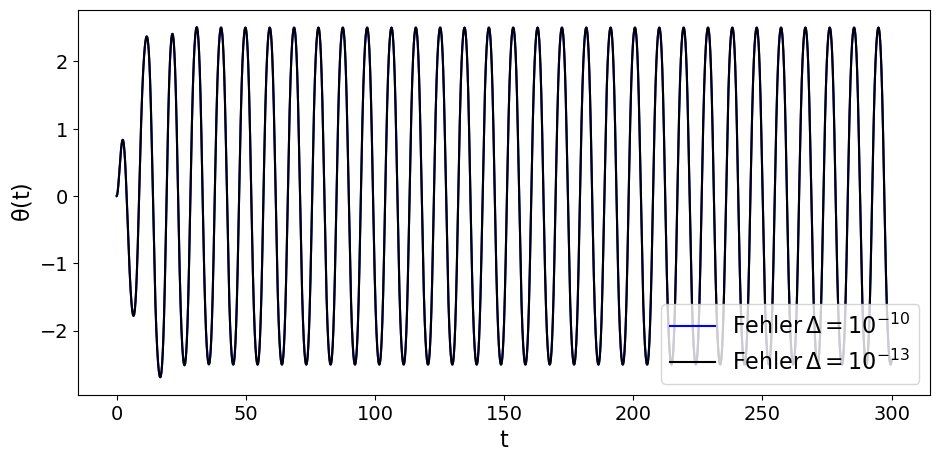

In [6]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm \theta(t)$")
plt.plot(Loes_0.t, Loes_0.y[0],c="blue", label=r"$\rm Fehler \, \Delta=10^{-10}$");
plt.plot(Loes_1.t, Loes_1.y[0],c="black", label=r"$\rm Fehler \, \Delta=10^{-13}$");
plt.legend(loc='lower right',fontsize=16);

Die obere Abbildung zeigt wie sich der Winkel $\theta$ des Pendels im Laufe der Zeit verändert. Beide Simulationen zeigen hierbei die gleichen Ergebnisse. Die untere Abbildung zeigt das zeitliche Verhalten der Winkelgeschwindigkeit $\frac{d \theta(t)}{dt}$. 

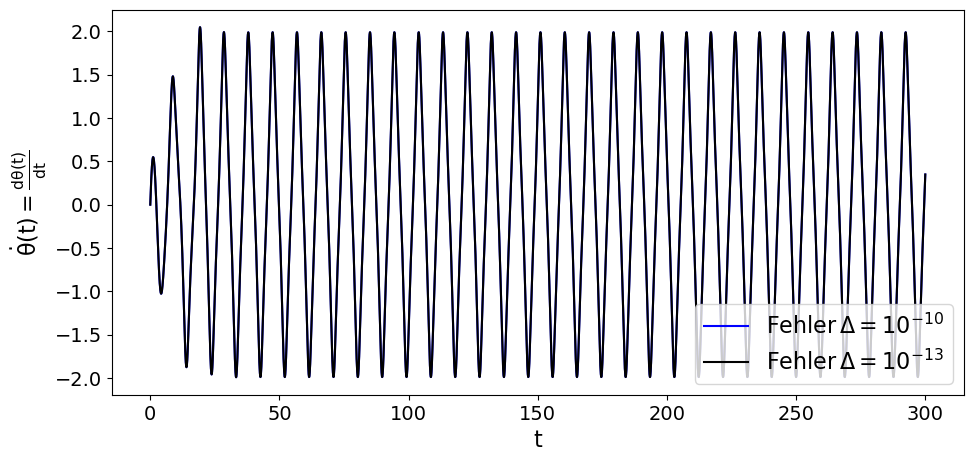

In [7]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
plt.plot(Loes_0.t, Loes_0.y[1],c="blue", label=r"$\rm Fehler \, \Delta=10^{-10}$");
plt.plot(Loes_1.t, Loes_1.y[1],c="black", label=r"$\rm Fehler \, \Delta=10^{-13}$");
plt.legend(loc='lower right',fontsize=16);

Die untere Abbildung veranschaulicht, dass die Phasenraumtrajektorie (Abbildung $\frac{d \theta(t)}{dt}$ vs. $\theta(t)$) des periodisch angetriebenen gedämpften Pendels für $A=0.9$ einem Grenzzyklus zulaufen, sodass nach einer Einschwingphase (hier $t \in [0,50]$) die periodische Bewegung stabil auf einem Attraktor-Grenzzyklus bleibt.

In [8]:
import matplotlib.gridspec as gridspec

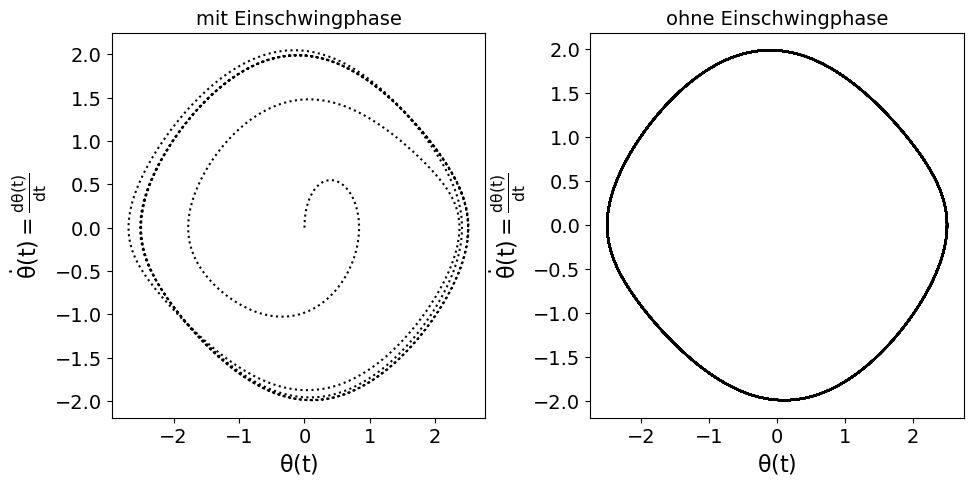

In [9]:
N_0 = np.where(Loes_1.t > 50)[0][0]
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.28)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax1.set_title("mit Einschwingphase")
ax2.set_title("ohne Einschwingphase")
ax1.set_xlabel(r"$\rm \theta(t)$")
ax1.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
ax2.set_xlabel(r"$\rm \theta(t)$")
ax2.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
ax1.plot(Loes_1.y[0][0:N_0], Loes_1.y[1][0:N_0],c="black",linestyle=":")
#ax1.plot(Loes_1.y[0][N_0:], Loes_1.y[1][N_0:],c="black")
ax2.plot(Loes_1.y[0][N_0:], Loes_1.y[1][N_0:],c="black");

Wir möchten nun die Bewegung des Pendels zusammen mit seiner Phasenraumtrajektorie in einer Animation veranschaulichen. Wir erstellen diese Animation mittels des Python Moduls Matplotlib und benutzen hierbei die Funktion "FuncAnimation(...)" (siehe <A href="https://matplotlib.org/stable/users/explain/animations/animations.html" target="_blank">Animations using Matplotlib</A>).

In [10]:
import matplotlib.animation as animation
from IPython.display import HTML

In [11]:
set_l = 1
plot_max=set_l + 0.5
step = int(N/1000)
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.28)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

def animate(i):
    ax1.cla()
    ax2.cla()
    ax1.set_xlabel(r"$\rm x $")
    ax1.set_ylabel(r"$\rm y $")
    ax1.set_aspect('equal')
    ax2.set_xlabel(r"$\rm \theta(t)$")
    ax2.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
    ax1.set_xlim(-plot_max,plot_max)
    ax1.set_ylim(-plot_max,plot_max)
    ax1.scatter(0, 0, s=30, marker='o', c="black")
    ax1.scatter(set_l*np.sin(Loes_1.y[0][step*i]), -set_l*np.cos(Loes_1.y[0][step*i]), s=80, marker='o', c="blue")
    ax1.plot([0,set_l*np.sin(Loes_1.y[0][step*i])],[0,-set_l*np.cos(Loes_1.y[0][step*i])] ,c="black",linewidth=1)
    ax2.plot(Loes_1.y[0][0:N_0], Loes_1.y[1][0:N_0],c="black",linestyle=":")
    ax2.plot(Loes_1.y[0][N_0:], Loes_1.y[1][N_0:],c="black")
    ax2.scatter(Loes_1.y[0][step*i], Loes_1.y[1][step*i], s=80, marker='o', c="blue")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=250,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

### Antriebsstärke $A=1.098$

Wir wählen nun einen höheren Wert der Antriebsstärke ($A=1.098$).

In [12]:
A = 1.098
Loes_0 = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, args=(beta,Omega,A, ), rtol=fehler_0, atol=fehler_0)
Loes_1 = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, args=(beta,Omega,A, ), rtol=fehler_1, atol=fehler_1)

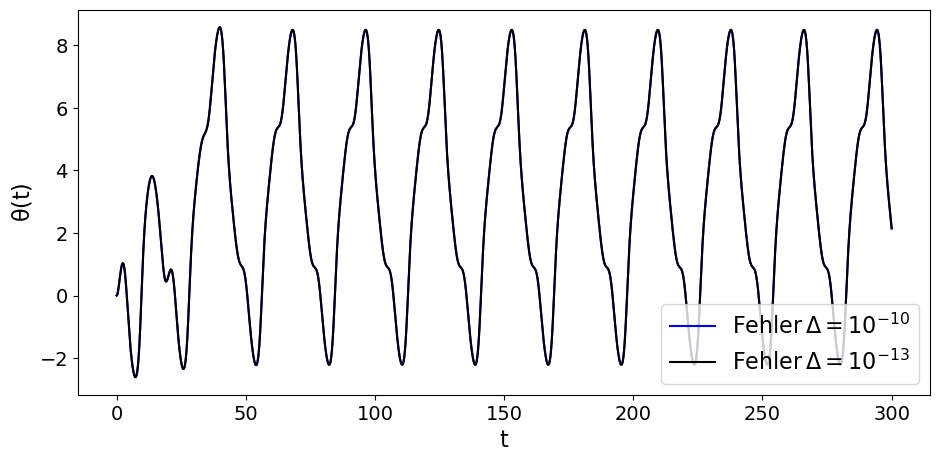

In [13]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm \theta(t)$")
plt.plot(Loes_0.t, Loes_0.y[0],c="blue", label=r"$\rm Fehler \, \Delta=10^{-10}$");
plt.plot(Loes_1.t, Loes_1.y[0],c="black", label=r"$\rm Fehler \, \Delta=10^{-13}$");
plt.legend(loc='lower right',fontsize=16);

Die obere Abbildung zeigt wieder wie sich der Winkel $\theta$ des Pendels im Laufe der Zeit verändert. Beide Simulationen zeigen hierbei auch wieder die gleichen Ergebnisse. Die untere Abbildung zeigt das zeitliche Verhalten der Winkelgeschwindigkeit $\frac{d \theta(t)}{dt}$. 

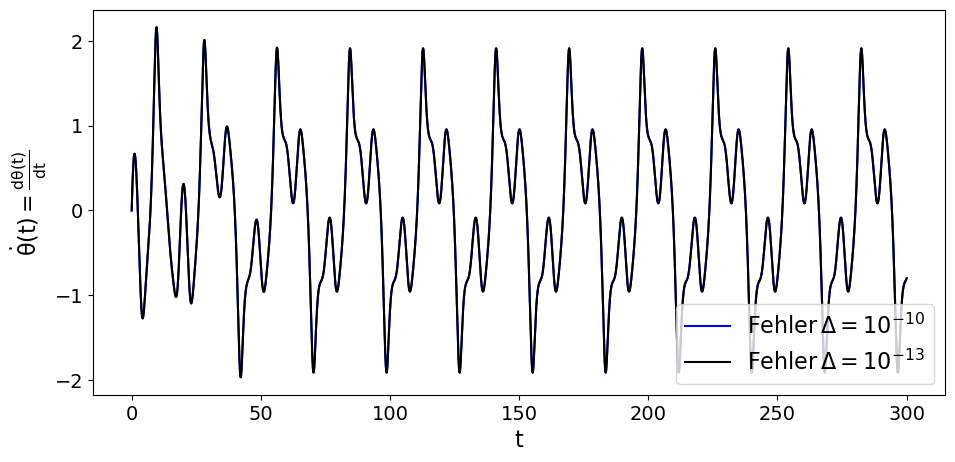

In [14]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
plt.plot(Loes_0.t, Loes_0.y[1],c="blue", label=r"$\rm Fehler \, \Delta=10^{-10}$");
plt.plot(Loes_1.t, Loes_1.y[1],c="black", label=r"$\rm Fehler \, \Delta=10^{-13}$");
plt.legend(loc='lower right',fontsize=16);

Die untere Abbildung veranschaulicht, dass die Phasenraumtrajektorie (Abbildung $\frac{d \theta(t)}{dt}$ vs. $\theta(t)$) des periodisch angetriebenen gedämpften Pendels auch für $A=1.098$ einem Grenzzyklus zulaufen, sodass nach einer Einschwingphase (hier $t \in [0,50]$) die periodische Bewegung stabil auf einem Attraktor-Grenzzyklus bleibt.

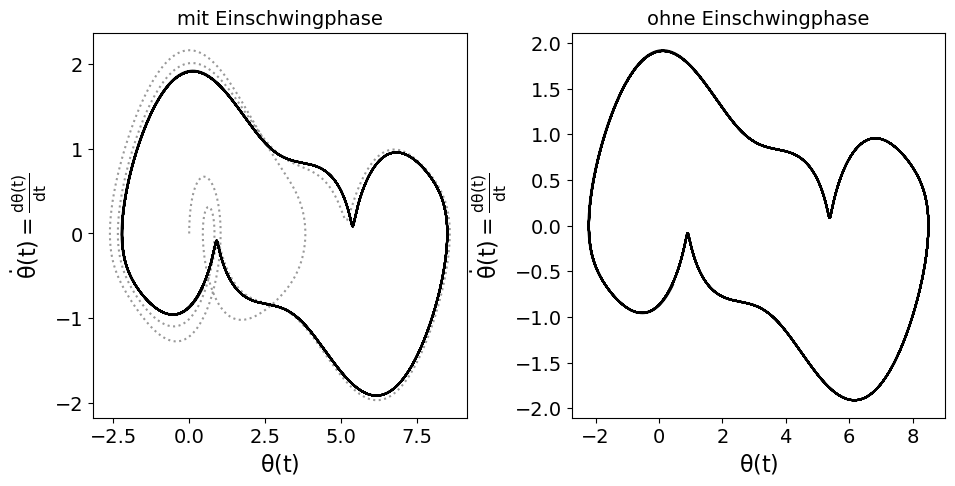

In [15]:
N_0 = np.where(Loes_1.t > 50)[0][0]
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.28)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax1.set_title("mit Einschwingphase")
ax2.set_title("ohne Einschwingphase")
ax1.set_xlabel(r"$\rm \theta(t)$")
ax1.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
ax2.set_xlabel(r"$\rm \theta(t)$")
ax2.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
ax1.plot(Loes_1.y[0][0:N_0], Loes_1.y[1][0:N_0],c="black",linestyle=":", alpha=0.4)
ax1.plot(Loes_1.y[0][N_0:], Loes_1.y[1][N_0:],c="black")
ax2.plot(Loes_1.y[0][N_0:], Loes_1.y[1][N_0:],c="black");

Die obere Abbildung zeigt, dass die Bewegung des Pendels auf dem Grenzzyklus einen Überschlag des Pendels periodisch erzeugt, da der Winkel $\theta$ teilweise über $\pi$ ist. Bei solchen Bewegungen werden die Phasenraumtrajektorien oft Modulo $2 \pi$ dargestellt. Mittels der unteren Funktion rechnen wir die urprünglichen Lösungen der Winkelveränderungen Modulo $2 \pi$ um und bilden sie auf das Intervall $-\pi < \theta \leq \pi$ ab. Eine Phasenraumtrajektorie, die das Bild am rechten oder linken Rand verläßt (dies entspricht einem Überschlagen des Pendels) taucht daher, in der neuen Darstellung, am gegenüberliegenden Rand wieder auf. Wir stellen dann die neuen Abbildungen der Phasenraumtrajektorien des Pendels dar.

In [16]:
def Mod_Winkel(liste_winkel):
    shift=0
    lwn=[]
    for w in liste_winkel:
        if(w+shift>=np.pi):
            shift=shift-2*np.pi
        if(w+shift<=-np.pi):
            shift=shift+2*np.pi
        lwn.append(w+shift)
    return lwn

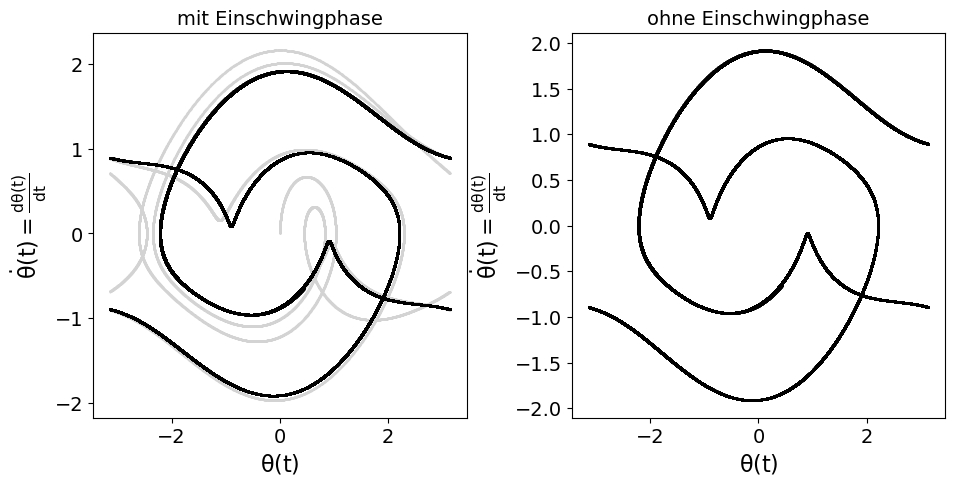

In [17]:
wn = Mod_Winkel(Loes_1.y[0])
N_0 = np.where(Loes_1.t > 50)[0][0]
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.28)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax1.set_title("mit Einschwingphase")
ax2.set_title("ohne Einschwingphase")
ax1.set_xlabel(r"$\rm \theta(t)$")
ax1.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
ax2.set_xlabel(r"$\rm \theta(t)$")
ax2.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
ax1.scatter(wn[0:N_0], Loes_1.y[1][0:N_0],c="lightgrey", s=1, marker='.')
ax1.scatter(wn[N_0:], Loes_1.y[1][N_0:],c="black", s=1, marker='o')
ax2.scatter(wn[N_0:], Loes_1.y[1][N_0:],c="black", s=1, marker='o');

Wir stellen uns die Bewegung wieder in einer Animation dar.

In [18]:
set_l = 1
plot_max=set_l+0.5
step = int(N/1000)
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.28)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

def animate(i):
    ax1.cla()
    ax2.cla()
    ax1.set_xlabel(r"$\rm x $")
    ax1.set_ylabel(r"$\rm y $")
    ax1.set_aspect('equal')
    ax2.set_xlabel(r"$\rm \theta(t)$")
    ax2.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
    ax1.set_xlim(-plot_max,plot_max)
    ax1.set_ylim(-plot_max,plot_max)
    ax1.scatter(0, 0, s=30, marker='o', c="black")
    ax1.scatter(set_l*np.sin(Loes_1.y[0][step*i]), -set_l*np.cos(Loes_1.y[0][step*i]), s=80, marker='o', c="blue")
    ax1.plot([0,set_l*np.sin(Loes_1.y[0][step*i])],[0,-set_l*np.cos(Loes_1.y[0][step*i])] ,c="black",linewidth=1)
    ax2.scatter(wn[0:N_0], Loes_1.y[1][0:N_0],c="lightgrey", s=1, marker='.')
    ax2.scatter(wn[N_0:], Loes_1.y[1][N_0:],c="black", s=1, marker='o',)
    ax2.scatter(wn[step*i], Loes_1.y[1][step*i], s=80, marker='o', c="blue")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=250,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

Wir vergleichen diese numerische Lösung nun auch mit den Resultaten eines C++ Programms <A href="http://itp.uni-frankfurt.de/~hanauske/VPROG/2025/C++/GetriebenesPendel.cpp" target="_blank">GetriebenesPendel.cpp</A>. Bei der Erzeugung der Daten wurden ebenfalls $N=100000$ Gitterpunkte verwendet und die Ergebnisse des C++ Programms wurden in die Datei "GetriebenesPendel.dat" geschrieben.

In [19]:
data = np.genfromtxt("./GetriebenesPendel.dat")

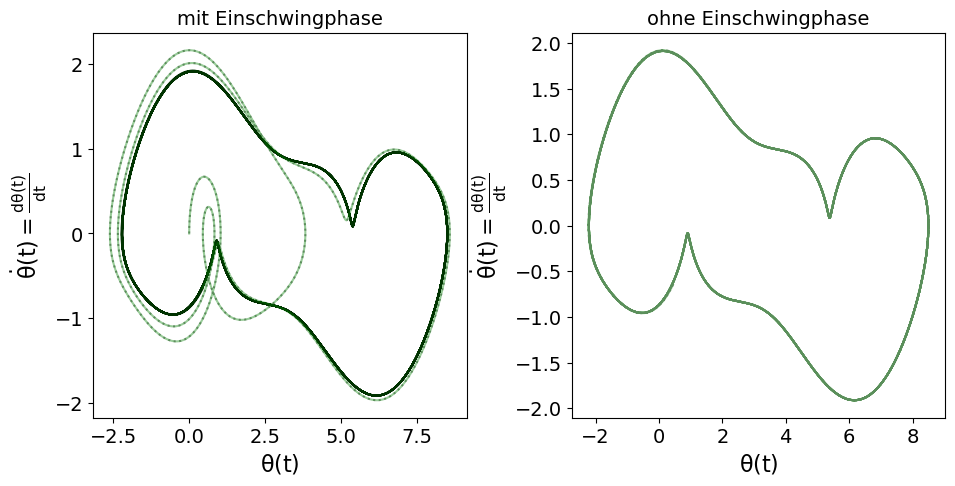

In [20]:
N_0 = np.where(Loes_1.t > 50)[0][0]
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.28)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax1.set_title("mit Einschwingphase")
ax2.set_title("ohne Einschwingphase")
ax1.set_xlabel(r"$\rm \theta(t)$")
ax1.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
ax2.set_xlabel(r"$\rm \theta(t)$")
ax2.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
ax1.plot(Loes_1.y[0][0:N_0], Loes_1.y[1][0:N_0],c="black",linestyle=":", alpha=0.4)
ax1.plot(Loes_1.y[0][N_0:], Loes_1.y[1][N_0:],c="black")
ax2.plot(Loes_1.y[0][N_0:], Loes_1.y[1][N_0:],c="black",linestyle=":", alpha=0.4)
ax1.plot(data[0:N_0,2], data[0:N_0,3],c="green", alpha=0.4)
ax1.plot(data[N_0:,2], data[N_0:,3],c="green", alpha=0.4)
ax2.plot(data[N_0:,2],data[N_0:,3],c="green", alpha=0.4);

In den oberen Abbildungen wird die Lösung des C++ Programms (grüne Kurve) mit der Python Lösung (schwarze Kurve) verglichen. Da beide Lösungen sehr genau miteinander übereinstimmen liegen die Kurven exakt aufeinander. Vergleicht man die absoluten Unterschiede beider Lösungen ($\Delta\theta(t) := \theta_{cpp}(t) - \theta_{python}(t)$ und $\Delta\dot{\theta}(t) := \dot{\theta}_{cpp}(t) - \dot{\theta}_{python}(t)$) miteinander und benutzt dabei die Python Lösung mit relativen und absoluten Fehler-Toleranzen (rtol und atol) von $10^{-13}$, so erhält man die folgenden Werte.

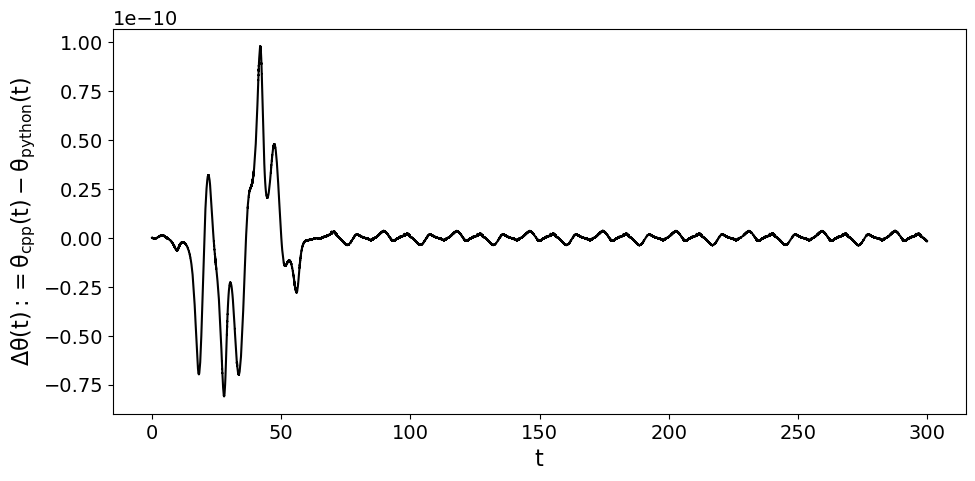

In [21]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm \Delta\theta(t) := \theta_{cpp}(t) - \theta_{python}(t)$")
plt.plot(Loes_1.t, data[:,2] - Loes_1.y[0],c="black");

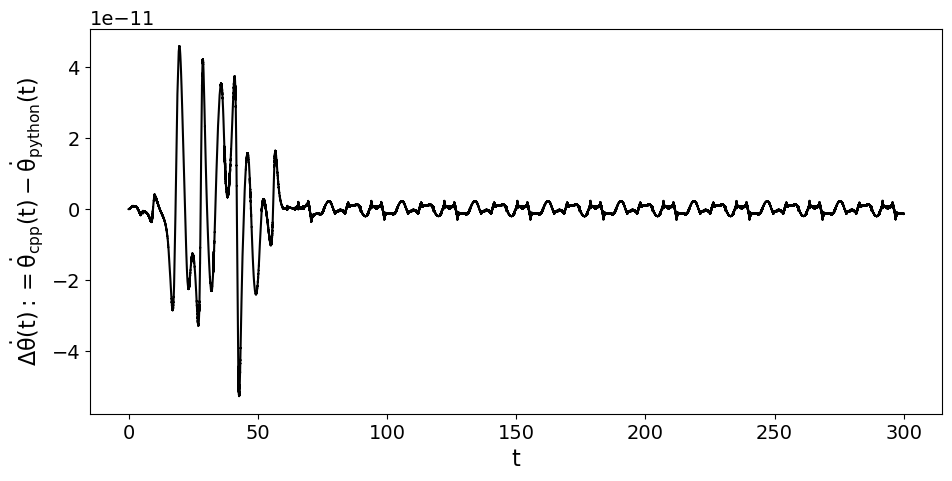

In [22]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm \Delta\dot{\theta}(t) := \dot{\theta}_{cpp}(t) - \dot{\theta}_{python}(t)$")
plt.plot(Loes_1.t, data[:,3] - Loes_1.y[1],c="black");

### Antriebsstärke $A=1.2$

Wir werden sehen, dass nun, bei einer Antriebsstärke von $A=1.2$, chaotische Bewegungsformen auftreten. Die zeitliche Entwicklung von chaotischen Bewegungen ist nicht vorhersagbar und es ist bemerkenswert, dass ein solches Chaos überhaupt in deterministischen Gleichungen entstehen kann (deterministisches Chaos). Aufgrund der hochgradig nicht-linearen Bewegungsgleichung des getriebenen Pendels können sich in gewissen Parameterbereichen kleine Ungenauigkeiten exponentiell vergrößern, sodass eine genaue Vorhersage der Bewegung nach einiger Zeit nicht mehr möglich ist. Um dies zu veranschaulichen, berechnen wir zusätzlich zu den beiden Simulationen unterschiedlicher Fehler-Toleranzen, eine weitere Simulation, die auch eine Fehler-Toleranz von $10^{-13}$ benutzt, bei der jedoch der Anfangswert des Pendels zur Zeit $t=0$ nicht exakt in der Nulllage positioniert ist ($\theta_0 = \theta(0) = 10^{-8}$, grüne Kurve).

In [23]:
A = 1.2
u_init_eps = [10**(-8),0]
Loes_0 = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, args=(beta,Omega,A, ), rtol=fehler_0, atol=fehler_0)
Loes_1 = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, args=(beta,Omega,A, ), rtol=fehler_1, atol=fehler_1)
Loes_2 = solve_ivp(DGLsys, [0, t_end], u_init_eps, t_eval=t_val, args=(beta,Omega,A, ), rtol=fehler_1, atol=fehler_1)

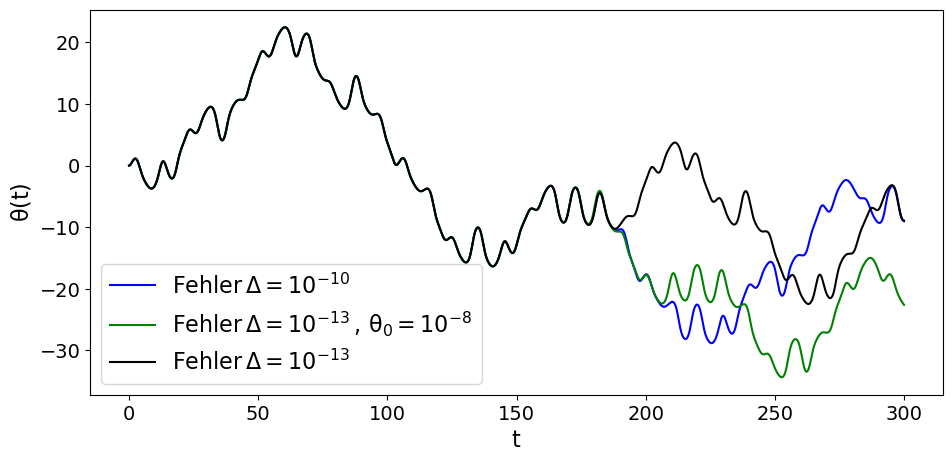

In [24]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm \theta(t)$")
plt.plot(Loes_0.t, Loes_0.y[0],c="blue", label=r"$\rm Fehler \, \Delta=10^{-10}$")
plt.plot(Loes_2.t, Loes_2.y[0],c="green", label=r"$\rm Fehler \, \Delta=10^{-13}\, , \, \theta_0=10^{-8}$")
plt.plot(Loes_1.t, Loes_1.y[0],c="black", label=r"$\rm Fehler \, \Delta=10^{-13}$")
plt.legend(loc='lower left',fontsize=16);

Die obere Abbildung zeigt, wie sich der Winkel $\theta$ des Pendels im Laufe der Zeit verändert. Man erkennt, dass sich die Simulationen ab einer gewissen Zeit merklich voneinander unterscheiden. Man kann somit die Bewegung des Pendels bei einer Antriebsstärke von $A=1.2$ für lange Zeiten nicht genau vorhersagen. Dies zeigt sich auch in der unteren Abbildung für das zeitliche Verhalten der Winkelgeschwindigkeit $\frac{d \theta(t)}{dt}$. 

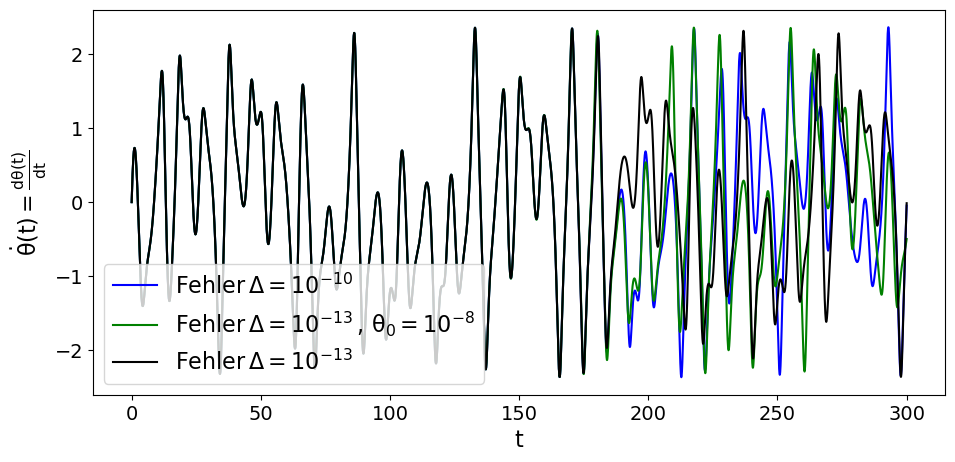

In [25]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
plt.plot(Loes_0.t, Loes_0.y[1],c="blue", label=r"$\rm Fehler \, \Delta=10^{-10}$")
plt.plot(Loes_2.t, Loes_2.y[1],c="green", label=r"$\rm Fehler \, \Delta=10^{-13}\, , \, \theta_0=10^{-8}$")
plt.plot(Loes_1.t, Loes_1.y[1],c="black", label=r"$\rm Fehler \, \Delta=10^{-13}$")
plt.legend(loc='lower left',fontsize=16);

Die untere Abbildung veranschaulicht die Phasenraumtrajektorie (Abbildung $\frac{d \theta(t)}{dt}$ vs. $\theta(t)$) des periodisch angetriebenen gedämpften Pendels für $A=1.2$. Auch nach einer Einschwingphase von $t \in [0,50]$ erkennt man keinen Grenzzyklus der Phasenraumtrajektorie und man spricht hierbei von einem chaotischen bzw. seltsamen Attraktor.

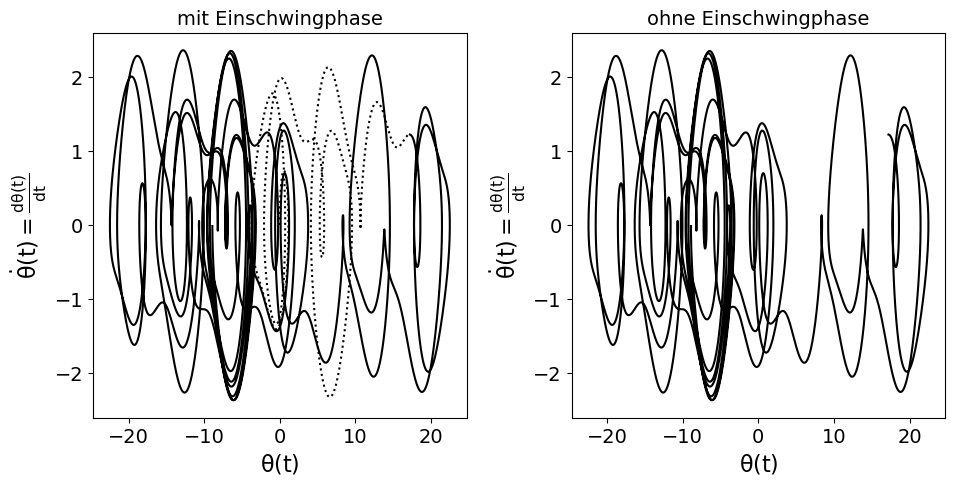

In [26]:
N_0 = np.where(Loes_1.t > 50)[0][0]
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.28)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax1.set_title("mit Einschwingphase")
ax2.set_title("ohne Einschwingphase")
ax1.set_xlabel(r"$\rm \theta(t)$")
ax1.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
ax2.set_xlabel(r"$\rm \theta(t)$")
ax2.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
ax1.plot(Loes_1.y[0][0:N_0], Loes_1.y[1][0:N_0],c="black",linestyle=":")
ax1.plot(Loes_1.y[0][N_0:], Loes_1.y[1][N_0:],c="black")
ax2.plot(Loes_1.y[0][N_0:], Loes_1.y[1][N_0:],c="black");

Wir stellen diesen chaotischen Attraktor wieder Modulo $2 \pi$ dar.

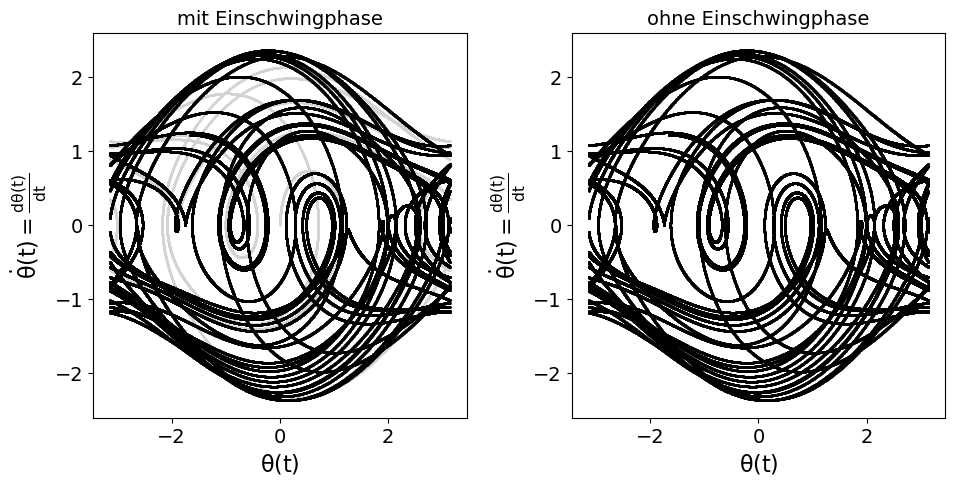

In [27]:
wn = Mod_Winkel(Loes_1.y[0])
N_0 = np.where(Loes_1.t > 50)[0][0]
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.28)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax1.set_title("mit Einschwingphase")
ax2.set_title("ohne Einschwingphase")
ax1.set_xlabel(r"$\rm \theta(t)$")
ax1.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
ax2.set_xlabel(r"$\rm \theta(t)$")
ax2.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
ax1.scatter(wn[0:N_0], Loes_1.y[1][0:N_0],c="lightgrey", s=1, marker='.')
ax1.scatter(wn[N_0:], Loes_1.y[1][N_0:],c="black", s=1, marker='o',)
ax2.scatter(wn[N_0:], Loes_1.y[1][N_0:],c="black", s=1, marker='o',);

Die untere Abbildung zeigt die Animation der chaotischen Bewegung.

In [28]:
set_l = 1
plot_max = set_l + 0.5
step = int(N/1000)
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.28)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

def animate(i):
    ax1.cla()
    ax2.cla()
    ax1.set_xlabel(r"$\rm x $")
    ax1.set_ylabel(r"$\rm y $")
    ax1.set_aspect('equal')
    ax2.set_xlabel(r"$\rm \theta(t)$")
    ax2.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
    ax1.set_xlim(-plot_max,plot_max)
    ax1.set_ylim(-plot_max,plot_max)
    ax1.scatter(0, 0, s=30, marker='o', c="black")
    ax1.scatter(set_l*np.sin(Loes_1.y[0][step*i]), -set_l*np.cos(Loes_1.y[0][step*i]), s=80, marker='o', c="blue")
    ax1.plot([0,set_l*np.sin(Loes_1.y[0][step*i])],[0,-set_l*np.cos(Loes_1.y[0][step*i])] ,c="black",linewidth=1)
    ax2.scatter(wn[0:N_0], Loes_1.y[1][0:N_0],c="lightgrey", s=1, marker='.')
    ax2.scatter(wn[N_0:], Loes_1.y[1][N_0:],c="black", s=1, marker='o',)
    ax2.scatter(wn[step*i], Loes_1.y[1][step*i], s=80, marker='o', c="blue")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=250,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

Wir vergleichen diese numerische Lösung auch wieder mit den Resultaten des C++ Programms <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/2025/C++/GetriebenesPendel.cpp" target="_blank">GetriebenesPendel.cpp</A>. Bei der Erzeugung der Daten wurden ebenfalls $N=100000$ Gitterpunkte verwendet und die Ergebnisse des C++ Programms wurden in die Datei "GetriebenesPendel_a.dat" und "GetriebenesPendel_b.dat" geschrieben, wobei bei der Simulation "GetriebenesPendel_b.dat" der Anfangswert des Pendels zur Zeit $t=0$ nicht exakt in der Nulllage positioniert ist ($\theta_0 = \theta(0) = 10^{-8}$, rote gepunktete Kurve in der unteren Abbildung).

In [29]:
data = np.genfromtxt("./GetriebenesPendel_a.dat")
data_b = np.genfromtxt("./GetriebenesPendel_b.dat")

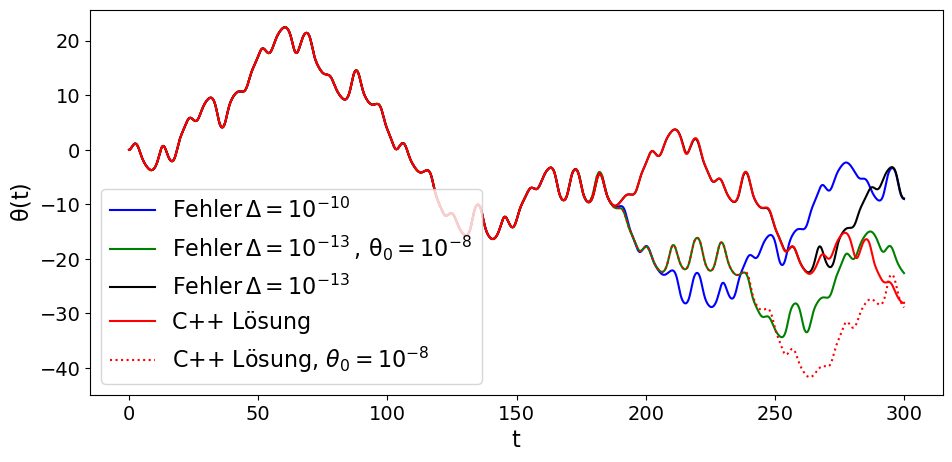

In [30]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm \theta(t)$")
plt.plot(Loes_0.t, Loes_0.y[0],c="blue", label=r"$\rm Fehler \, \Delta=10^{-10}$")
plt.plot(Loes_2.t, Loes_2.y[0],c="green", label=r"$\rm Fehler \, \Delta=10^{-13}\, , \, \theta_0=10^{-8}$")
plt.plot(Loes_1.t, Loes_1.y[0],c="black", label=r"$\rm Fehler \, \Delta=10^{-13}$")
plt.plot(Loes_1.t, data[:,2],c="red", label="C++ Lösung")
plt.plot(Loes_1.t, data_b[:,2],c="red", linestyle=":", label=r"C++ Lösung, $\theta_0=10^{-8}$")
plt.legend(loc='lower left',fontsize=16);

Vergleicht man die absoluten Unterschiede der Lösungen ($\Delta\theta(t) := \theta_{cpp}(t) - \theta_{python}(t)$) miteinander, so erhält man die folgende Grafik.

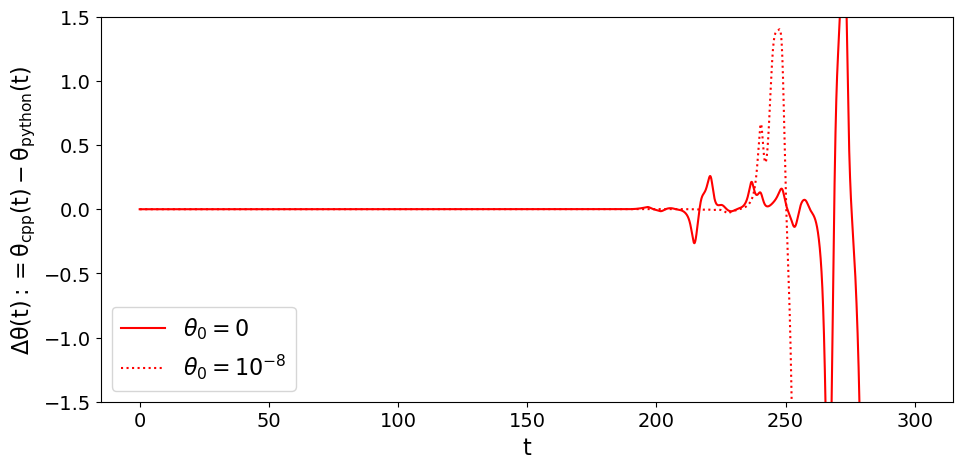

In [31]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm \Delta\theta(t) := \theta_{cpp}(t) - \theta_{python}(t)$")
plt.ylim(-1.5,1.5)
plt.plot(Loes_1.t, data[:,2] - Loes_1.y[0],c="red", label=r"$\theta_0=0$")
plt.plot(Loes_1.t, data_b[:,2] - Loes_2.y[0],c="red", linestyle=":", label=r"$\theta_0=10^{-8}$")
plt.legend(loc='lower left',fontsize=16);

### Antriebsstärke $A=1.4$

Erhöht man die Antriebsstärke weiter, auf $A=1.4$, so verschwindet die chaotische Bewegung wieder und man erhält den folgenden Attaktor-Grenzzyklus.

In [32]:
A = 1.4
Loes_1 = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, args=(beta,Omega,A, ), rtol=fehler_1, atol=fehler_1)
wn = Mod_Winkel(Loes_1.y[0])

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.28)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

def animate(i):
    ax1.cla()
    ax2.cla()
    ax1.set_xlabel(r"$\rm x $")
    ax1.set_ylabel(r"$\rm y $")
    ax1.set_aspect('equal')
    ax2.set_xlabel(r"$\rm \theta(t)$")
    ax2.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
    ax1.set_xlim(-plot_max,plot_max)
    ax1.set_ylim(-plot_max,plot_max)
    ax1.scatter(0, 0, s=30, marker='o', c="black")
    ax1.scatter(set_l*np.sin(Loes_1.y[0][step*i]), -set_l*np.cos(Loes_1.y[0][step*i]), s=80, marker='o', c="blue")
    ax1.plot([0,set_l*np.sin(Loes_1.y[0][step*i])],[0,-set_l*np.cos(Loes_1.y[0][step*i])] ,c="black",linewidth=1)
    ax2.scatter(wn[0:N_0], Loes_1.y[1][0:N_0],c="lightgrey", s=1, marker='.')
    ax2.scatter(wn[N_0:], Loes_1.y[1][N_0:],c="black", s=1, marker='o',)
    ax2.scatter(wn[step*i], Loes_1.y[1][step*i], s=80, marker='o', c="blue")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=250,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

Bei weiterer Erhöhung der Antriebsstärke ergibt sich der folgende Zyklus.

### Antriebsstärke $A=1.46$

In [33]:
A = 1.46
Loes_1 = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, args=(beta,Omega,A, ), rtol=fehler_1, atol=fehler_1)
wn = Mod_Winkel(Loes_1.y[0])

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.28)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

def animate(i):
    ax1.cla()
    ax2.cla()
    ax1.set_xlabel(r"$\rm x $")
    ax1.set_ylabel(r"$\rm y $")
    ax1.set_aspect('equal')
    ax2.set_xlabel(r"$\rm \theta(t)$")
    ax2.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
    ax1.set_xlim(-plot_max,plot_max)
    ax1.set_ylim(-plot_max,plot_max)
    ax1.scatter(0, 0, s=30, marker='o', c="black")
    ax1.scatter(set_l*np.sin(Loes_1.y[0][step*i]), -set_l*np.cos(Loes_1.y[0][step*i]), s=80, marker='o', c="blue")
    ax1.plot([0,set_l*np.sin(Loes_1.y[0][step*i])],[0,-set_l*np.cos(Loes_1.y[0][step*i])] ,c="black",linewidth=1)
    ax2.scatter(wn[0:N_0], Loes_1.y[1][0:N_0],c="lightgrey", s=1, marker='.')
    ax2.scatter(wn[N_0:], Loes_1.y[1][N_0:],c="black", s=1, marker='o',)
    ax2.scatter(wn[step*i], Loes_1.y[1][step*i], s=80, marker='o', c="blue")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=250,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

Man erkennt in der oberen Abbildung, dass sich eine sogenannte Bifurkation mit Periodenverdopplung bei dieser Antriebsstärke ergeben hat.

### Antriebsstärke $A=1.47$

In [34]:
A = 1.47
Loes_1 = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, args=(beta,Omega,A, ), rtol=fehler_1, atol=fehler_1)
wn = Mod_Winkel(Loes_1.y[0])

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.28)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

def animate(i):
    ax1.cla()
    ax2.cla()
    ax1.set_xlabel(r"$\rm x $")
    ax1.set_ylabel(r"$\rm y $")
    ax1.set_aspect('equal')
    ax2.set_xlabel(r"$\rm \theta(t)$")
    ax2.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
    ax1.set_xlim(-plot_max,plot_max)
    ax1.set_ylim(-plot_max,plot_max)
    ax1.scatter(0, 0, s=30, marker='o', c="black")
    ax1.scatter(set_l*np.sin(Loes_1.y[0][step*i]), -set_l*np.cos(Loes_1.y[0][step*i]), s=80, marker='o', c="blue")
    ax1.plot([0,set_l*np.sin(Loes_1.y[0][step*i])],[0,-set_l*np.cos(Loes_1.y[0][step*i])] ,c="black",linewidth=1)
    ax2.scatter(wn[0:N_0], Loes_1.y[1][0:N_0],c="lightgrey", s=1, marker='.')
    ax2.scatter(wn[N_0:], Loes_1.y[1][N_0:],c="black", s=1, marker='o',)
    ax2.scatter(wn[step*i], Loes_1.y[1][step*i], s=80, marker='o', c="blue")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=250,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

Für $A = 1.47$ sehen wir eine zweite Periodenverdopplung.

### Antriebsstärke $A=1.5$

Nach dieser Bifurkationskaskade ergibt sich dann wieder ein Bereich mit chaotischen Lösungen.

In [35]:
A = 1.5
Loes_1 = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, args=(beta,Omega,A, ), rtol=fehler_1, atol=fehler_1)
wn = Mod_Winkel(Loes_1.y[0])

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.28)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

def animate(i):
    ax1.cla()
    ax2.cla()
    ax1.set_xlabel(r"$\rm x $")
    ax1.set_ylabel(r"$\rm y $")
    ax1.set_aspect('equal')
    ax2.set_xlabel(r"$\rm \theta(t)$")
    ax2.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
    ax1.set_xlim(-plot_max,plot_max)
    ax1.set_ylim(-plot_max,plot_max)
    ax1.scatter(0, 0, s=30, marker='o', c="black")
    ax1.scatter(set_l*np.sin(Loes_1.y[0][step*i]), -set_l*np.cos(Loes_1.y[0][step*i]), s=80, marker='o', c="blue")
    ax1.plot([0,set_l*np.sin(Loes_1.y[0][step*i])],[0,-set_l*np.cos(Loes_1.y[0][step*i])] ,c="black",linewidth=1)
    ax2.scatter(wn[0:N_0], Loes_1.y[1][0:N_0],c="lightgrey", s=1, marker='.')
    ax2.scatter(wn[N_0:], Loes_1.y[1][N_0:],c="black", s=1, marker='o',)
    ax2.scatter(wn[step*i], Loes_1.y[1][step*i], s=80, marker='o', c="blue")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=250,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

### Antriebsstärke $A=1.6$

Bei einer Antriebsstärke von $A=1.6$ erhält man wieder eine reguläre (nicht-chaotische) Lösung.

In [36]:
A = 1.6
Loes_1 = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, args=(beta,Omega,A, ), rtol=fehler_1, atol=fehler_1)
wn = Mod_Winkel(Loes_1.y[0])

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.28)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

def animate(i):
    ax1.cla()
    ax2.cla()
    ax1.set_xlabel(r"$\rm x $")
    ax1.set_ylabel(r"$\rm y $")
    ax1.set_aspect('equal')
    ax2.set_xlabel(r"$\rm \theta(t)$")
    ax2.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
    ax1.set_xlim(-plot_max,plot_max)
    ax1.set_ylim(-plot_max,plot_max)
    ax1.scatter(0, 0, s=30, marker='o', c="black")
    ax1.scatter(set_l*np.sin(Loes_1.y[0][step*i]), -set_l*np.cos(Loes_1.y[0][step*i]), s=80, marker='o', c="blue")
    ax1.plot([0,set_l*np.sin(Loes_1.y[0][step*i])],[0,-set_l*np.cos(Loes_1.y[0][step*i])] ,c="black",linewidth=1)
    ax2.scatter(wn[0:N_0], Loes_1.y[1][0:N_0],c="lightgrey", s=1, marker='.')
    ax2.scatter(wn[N_0:], Loes_1.y[1][N_0:],c="black", s=1, marker='o',)
    ax2.scatter(wn[step*i], Loes_1.y[1][step*i], s=80, marker='o', c="blue")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=250,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

## Attraktordiagramm (Feigenbaum-Diagramm)

Die unterschiedlichen numerischen Lösungen gliedern sich somit nach dem Wert der Antriebsstärke $A$, die hier als ein Systemparameter fungiert. Um einen globalen Überblick über das Verhalten eines teils-chaotischen Systems zu erhalten, erstellt man gewöhnlich ein Attraktordiagramm. In diesem Diagramm wird die Abfolge von regulären und chaotischen Bereichen visualisiert, indem man den Wert einer der Systemkoordinaten (hier $\dot{\theta}(t_n)$) in regelmäßigen Zeitabständen $t_n$ als Funktion des Systemparameter $A$ darstellt. Das Abtasten der Systemkoordinate geschieht hierbei bei Zeitabständen $t_n$, die durch die charakteristische Frequenz $\Omega$ der äußeren periodischen Kraft definiert sind. Um diese Vorgehensweise zu verdeutlichen ist die zeitliche Entwicklung der Systemkoordinate für drei Simulationen ($A=0.95$, $A=1.13$ und $A=1.20$) in dem unteren Diagramm dargestellt. Zusätzlich wurden die Werte der Winkelgeschwindigkeiten $\dot{\theta}(t_n)$ bei den Zeitwerten $t_n = t_0 + n \cdot \frac{2 \pi}{\Omega}$ markiert. Die Ergebnisse wurden dabei erst nach einer gewissen Einschwingphase $t_0 = 15 \cdot \frac{2 \pi}{\Omega} \approx 141.37$ visualisiert.

In [37]:
t_end = 500
N = 100000
t_val = np.linspace(0, t_end, N+1)
A = 1.2
Loes_1a = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, args=(beta,Omega,A, ), rtol=fehler_1, atol=fehler_1)
A = 1.13
Loes_1b = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, args=(beta,Omega,A, ), rtol=fehler_1, atol=fehler_1)
A = 0.95
Loes_1c = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, args=(beta,Omega,A, ), rtol=fehler_1, atol=fehler_1)

In [38]:
t_n_index = []
ni = 15
while (ni*2*np.pi/Omega) < t_end:
    ti_index = np.where(Loes_1a.t < ni * 2*np.pi/Omega)[0][-1]
    t_n_index.append(ti_index)
    ni = ni + 1

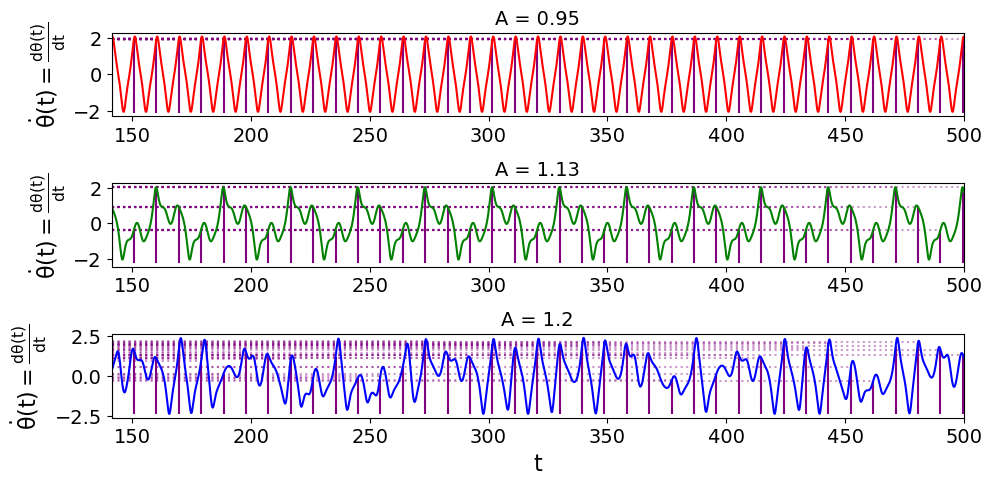

In [39]:
N_0 = t_n_index[0]
fig = plt.figure()
gs = gridspec.GridSpec(3, 1, hspace=0.8)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax3.set_xlim([Loes_1a.t[N_0], Loes_1a.t[-1]])
ax2.set_xlim([Loes_1a.t[N_0], Loes_1a.t[-1]])
ax1.set_xlim([Loes_1a.t[N_0], Loes_1a.t[-1]])
ax3.set_title("A = 1.2")
ax2.set_title("A = 1.13")
ax1.set_title("A = 0.95")
ax3.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
ax2.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
ax1.set_ylabel(r"$\rm \dot{\theta}(t) = \frac{d \theta(t)}{dt}$")
ax3.set_xlabel(r"$\rm t$")

for tn_i in t_n_index:
    ax3.vlines(x = Loes_1a.t[tn_i], ymin = np.min(Loes_1a.y[1]), ymax = Loes_1a.y[1][tn_i],colors = 'purple')
    ax3.hlines(y=Loes_1a.y[1][tn_i], xmin=Loes_1a.t[N_0], xmax=Loes_1a.t[tn_i],colors = 'purple',linestyle=":", alpha=0.4)
    ax2.vlines(x = Loes_1b.t[tn_i], ymin = np.min(Loes_1b.y[1]), ymax = Loes_1b.y[1][tn_i],colors = 'purple')
    ax2.hlines(y=Loes_1b.y[1][tn_i], xmin=Loes_1b.t[N_0], xmax=Loes_1b.t[tn_i],colors = 'purple',linestyle=":", alpha=0.4)
    ax1.vlines(x = Loes_1c.t[tn_i], ymin = np.min(Loes_1c.y[1]), ymax = Loes_1c.y[1][tn_i],colors = 'purple')
    ax1.hlines(y=Loes_1c.y[1][tn_i], xmin=Loes_1c.t[N_0], xmax=Loes_1c.t[tn_i],colors = 'purple',linestyle=":", alpha=0.4)


ax3.plot(Loes_1a.t[N_0:], Loes_1a.y[1][N_0:],c="blue")
ax2.plot(Loes_1b.t[N_0:], Loes_1b.y[1][N_0:],c="green")
ax1.plot(Loes_1c.t[N_0:], Loes_1c.y[1][N_0:],c="red");

Man erkennt in der oberen Abbildung, dass die Simulationen mit $A=0.95$ und $A=1.13$ eine reguläre Struktur zeigen und als Folge dessen auch die Winkelgeschwindigkeiten $\dot{\theta}(t_n)$ bei den Zeitwerten $t_n$ feste Werte ergeben. Bei $A=0.95$ z.B. einen Wert von $\dot{\theta}(t_n)\approx 1.92$ und für $A=1.13$ drei feste Werte. Für $A=1.2$ ergeben sich jedoch unterschiedliche Werte und es ist keine reguläre Struktur zu erkennen.

In [40]:
Loes_1c.y[1][t_n_index]

array([1.92759229, 1.92775299, 1.92791361, 1.92807415, 1.9282346 ,
       1.92839498, 1.92855527, 1.92871548, 1.92524991, 1.9254118 ,
       1.9255736 , 1.92573533, 1.92589698, 1.92605854, 1.92622002,
       1.92638142, 1.92654274, 1.92670397, 1.92686513, 1.9270262 ,
       1.92718719, 1.9273481 , 1.92750892, 1.92766967, 1.92783033,
       1.92799091, 1.92815141, 1.92831183, 1.92847216, 1.92863241,
       1.92879259, 1.92532786, 1.92548971, 1.92565148, 1.92581317,
       1.92597477, 1.92613629, 1.92629774, 1.9264591 ])

und bei $A=1.13$ drei unterschiedliche Werte:

In [41]:
Loes_1b.y[1][t_n_index]

array([ 0.93267116, -0.36041146,  2.03563398,  0.93250701, -0.36008491,
        2.03549684,  0.9323427 , -0.35975838,  2.0363745 ,  0.93340965,
       -0.36188315,  2.03624184,  0.93324598, -0.36155652,  2.03610837,
        0.93308219, -0.36122992,  2.03597408,  0.93291829, -0.36090333,
        2.03583899,  0.93275427, -0.36057676,  2.03570308,  0.93259014,
       -0.3602502 ,  2.03556636,  0.93242588, -0.35992367,  2.03542883,
        0.93226152, -0.36204848,  2.03630909,  0.93332884, -0.36172185,
        2.03617603,  0.93316511, -0.36139524,  2.03604216])

Die chaotische Bewegung bei $A=1.2$ liefert jedoch stehts einen anderen Wert der Winkelgeschwindigkeit.

In [42]:
Loes_1a.y[1][t_n_index]

array([ 0.29669   ,  1.59050313,  1.09019416,  1.59279945,  0.92105591,
        0.14294415,  1.49754609,  1.27680244,  1.06215584, -0.11068344,
        1.16221385, -0.10489513,  0.02126659,  0.56005439,  2.14568265,
        1.29915684,  1.13088205,  1.98853253,  1.716839  ,  1.93402403,
        1.9628245 ,  1.8448535 ,  2.0890358 ,  1.9277109 ,  1.31159579,
       -0.26847501,  1.41460149,  0.14113601,  1.30050318,  1.12952694,
        1.98832575,  1.73812659,  2.05163626,  0.53198076, -0.29215839,
        1.8544187 ,  2.08735394,  1.63470064,  1.32364433])

Stellen wir die, bei dieser stroboskopischen Vorgehensweise gewonnenen Werte, in einem $(\theta , \dot{\theta})$-Phasenraum dar, so nennt man diese Abbildung einen Poincar&eacute;-Schnitt, und die kontinuierlichen
Trajektorien der Simulationen verwandelt sich in eine Punkt-Abbildung. Die Poincar&eacute;-Schnitte von regulären, nicht-chaotische Bewegungen bestehen lediglich aus einem Punkt (hier die Simulation mit $A=0.95$) bzw. aus mehreren festen Punkten (hier drei Punkte für die Simulation mit $A=1.13$), wobei sich an der Anzahl der Punkte die
Periodenlänge der Schwingung ablesen lässt. Bei chaotischen Bewegungen ergibt sich hingegen ein Poincar&eacute;-Schnitt, welcher ausgedehnte Teilbereiche des $(\theta , \dot{\theta})$-Phasenraums bedeckt (hier der seltsame Attraktor der Simulation mit $A=1.2$).

In [43]:
t_end = 5000
N = 300000
t_val = np.linspace(0, t_end, N+1)
A = 1.2
Loes_1a = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, args=(beta,Omega,A, ), rtol=fehler_1, atol=fehler_1)
A = 1.13
Loes_1b = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, args=(beta,Omega,A, ), rtol=fehler_1, atol=fehler_1)
A = 0.95
Loes_1c = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, args=(beta,Omega,A, ), rtol=fehler_1, atol=fehler_1)

t_n_index = []
ni = 15
while (ni*2*np.pi/Omega) < t_end:
    ti_index = np.where(Loes_1a.t < ni * 2*np.pi/Omega)[0][-1]
    t_n_index.append(ti_index)
    ni = ni + 1
wna = Mod_Winkel(Loes_1a.y[0])
wnb = Mod_Winkel(Loes_1b.y[0])
wnc = Mod_Winkel(Loes_1c.y[0])

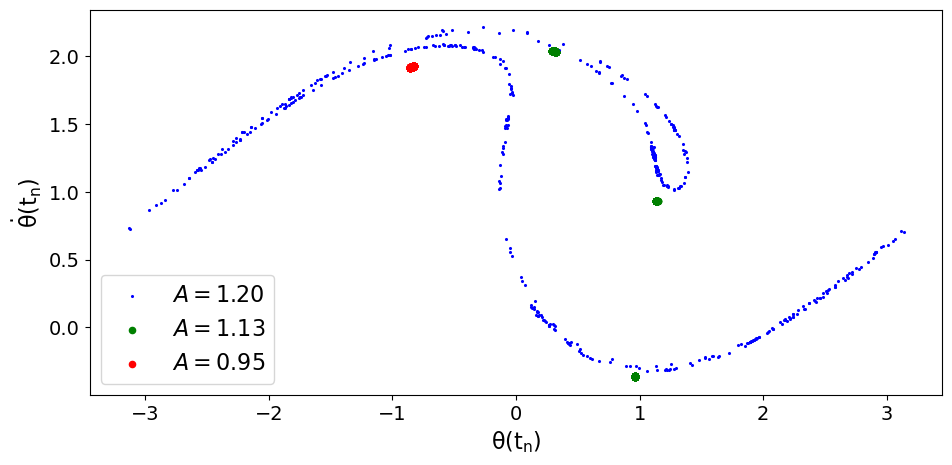

In [44]:
plt.xlabel(r"$\rm \theta(t_n)$")
plt.ylabel(r"$\rm \dot{\theta}(t_n)$")
plt.scatter(wna[t_n_index[0]], Loes_1a.y[1][t_n_index[0]],c="blue", marker='o', s=1.5, label=r"$A=1.20$")
plt.scatter(wnb[t_n_index[0]], Loes_1b.y[1][t_n_index[0]],c="green", marker='o', s=20, label=r"$A=1.13$")
plt.scatter(wnc[t_n_index[0]], Loes_1c.y[1][t_n_index[0]],c="red", marker='o', s=20, label=r"$A=0.95$")
for tn_i in t_n_index:
    plt.scatter(wna[tn_i], Loes_1a.y[1][tn_i],c="blue", marker='o', s=1.5)
    plt.scatter(wnb[tn_i], Loes_1b.y[1][tn_i],c="green", marker='o', s=20)
    plt.scatter(wnc[tn_i], Loes_1c.y[1][tn_i],c="red", marker='o', s=20)
plt.legend(loc='lower left',fontsize=16);

In dem folgenden Attraktordiagramm stellen wir 200 unterschiedliche Pendelsimulationen dar, wobei wir den Wert der Amplitude der äußeren periodischen Kraft von $A=0.95$ auf $A=1.35$ erhöhen. Wir stellen für jede der Simulationen die Winkelgeschwindigkeiten $\dot{\theta}(t_n)$ bei den Zeitwerten $t_n = t_0 + n \cdot \frac{2 \pi}{\Omega}$ dar, wobei wir wieder erst nach einer gewissen Einschwingphase $t_0 = 15 \cdot \frac{2 \pi}{\Omega} \approx 141.37$ mit dem Abtasten der Werte starten.

In [45]:
num_pendel = 200
list_A = np.linspace(0.95, 1.35, num_pendel)
t_end = 500
N = 100000
t_val = np.linspace(0, t_end, N+1)
attr_list = []
for Ai in list_A:
    Loes_1 = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, args=(beta,Omega,Ai, ), rtol=fehler_1, atol=fehler_1)
    attr_list_i = []
    ni = 15
    while (ni*2*np.pi/Omega) < t_end:
        ti_index = np.where(Loes_1.t < ni * 2*np.pi/Omega)[0][-1]
        attr_list_i.append(Loes_1.y[1][ti_index])
        ni = ni + 1
    attr_list.append(attr_list_i)

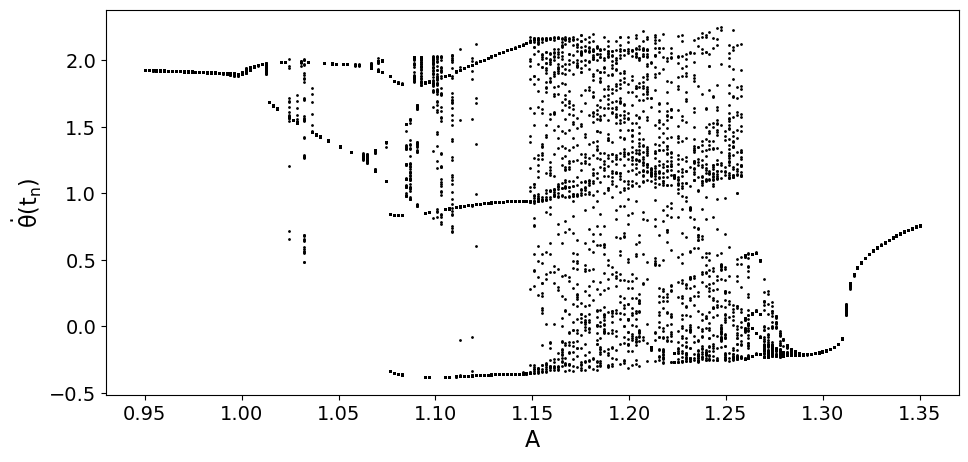

In [46]:
plt.xlabel(r"$\rm A$")
plt.ylabel(r"$\rm \dot{\theta}(t_n)$")
for i in range(num_pendel):
    plt.plot([list_A[i]]*len(attr_list[i]), attr_list[i], 'o',c="black", markersize=1)

Wir vergleichen diese numerischen Ergebnisse auch wieder mit den Resultaten eines C++ Programms <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/2025/C++/GetriebenesPendel_attr_dia.cpp" target="_blank">GetriebenesPendel_attr_dia.cpp</A> (siehe <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/2025/C++/GetriebenesPendel_attr_dia_omp.cpp" target="_blank">GetriebenesPendel_attr_dia_omp.cpp</A> für eine Version mit OpenMP-Parallelisierung). Bei der Erzeugung der Daten wurden ebenfalls $N=100000$ Gitterpunkte für jede Simulation verwendet und 2000 unterschiedliche Pendelsimulationen im Bereich $A=0.95$ bis $A=1.35$ durchgeführt.

In [47]:
data_attr = np.genfromtxt("./GetriebenesPendel_attr_dia.dat")

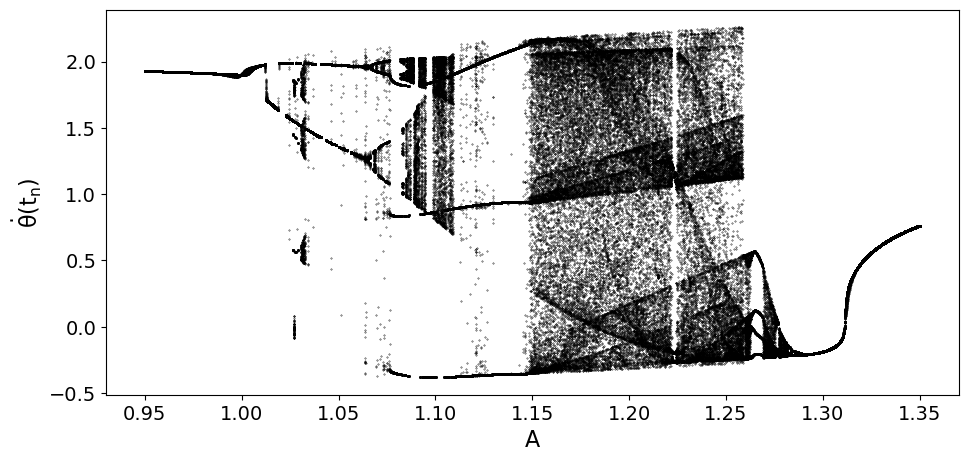

In [48]:
plt.xlabel(r"$\rm A$")
plt.ylabel(r"$\rm \dot{\theta}(t_n)$")
for i in range(len(data_attr[0,:])-1):
    plt.plot(data_attr[:,0],data_attr[:,i+1] , 'o',c="black", markersize=0.3)

Es folgt das Feigenbaum-Diagramm für Pendelsimulationen im Bereich $A=0.95$ bis $A=1.6$:

In [49]:
data_attr = np.genfromtxt("./GetriebenesPendel_attr_dia1.dat")

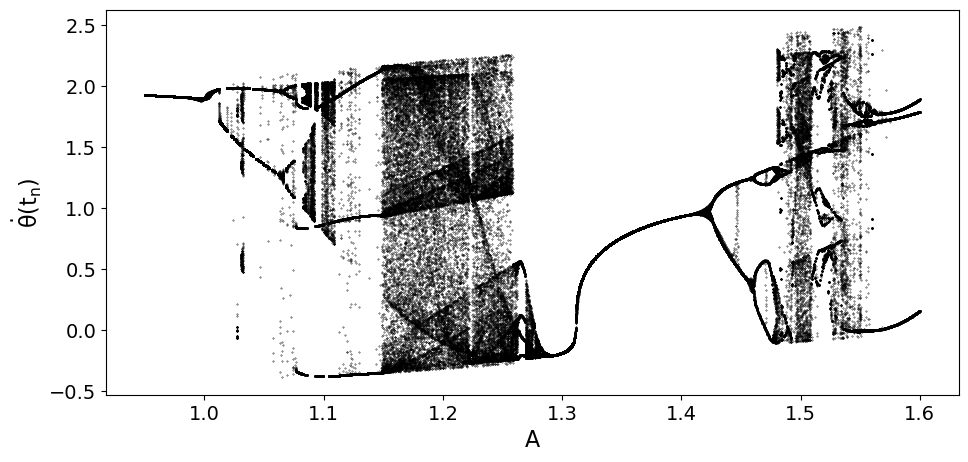

In [50]:
plt.xlabel(r"$\rm A$")
plt.ylabel(r"$\rm \dot{\theta}(t_n)$")
for i in range(len(data_attr[0,:])-1):
    plt.plot(data_attr[:,0],data_attr[:,i+1] , 'o',c="black", markersize=0.3)

In dem oberen Diagramm ist es durch eine Farbgebung der Punkte auch möglich Informationen über den Wert der Winkelkoordinate zu erzeugen. Wir haben dazu das C++ Programm leicht abgeändert und neben den Werten $\dot{\theta}(t_n)$ auch die entsprechenden Werte der Winkelkoordinate $\theta(t_n)$ berechnet (siehe <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/2025/C++/GetriebenesPendel_attr_dia_omp_a.cpp" target="_blank">GetriebenesPendel_attr_dia_omp_a.cpp</A>). In der unteren Abbildung wurde die Farbgebung entsprechend der Winkelkoordinate $\theta(t_n)$ gewählt ($-\pi < \theta \leq \pi$).

In [51]:
data_attr = np.genfromtxt("./GetriebenesPendel_attr_dia2.dat")

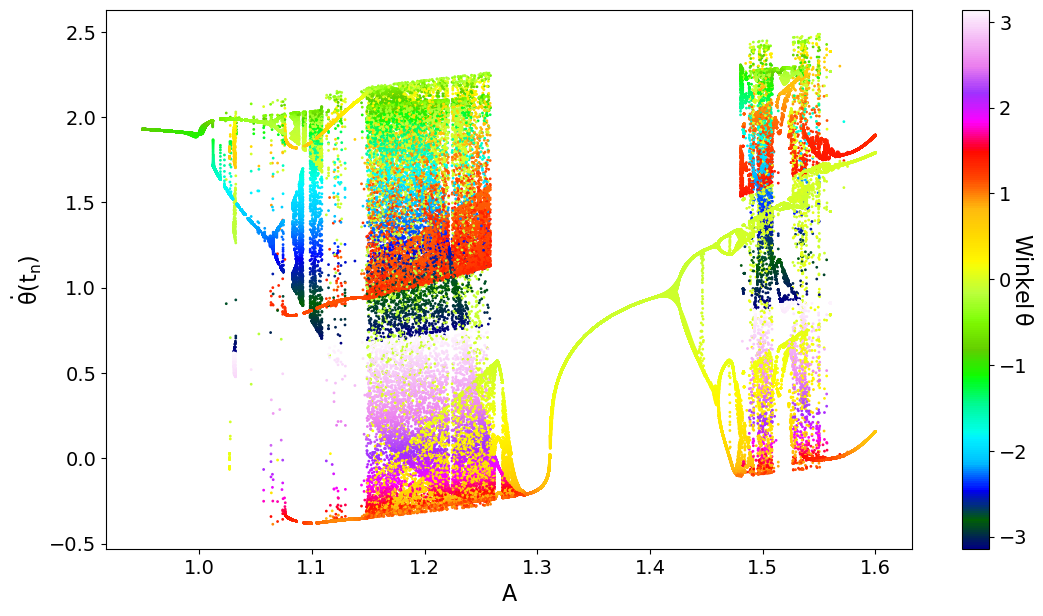

In [52]:
plt.rcParams["figure.figsize"] = (13,7)              # Aenderung der Bildabmessungen
plt.xlabel(r"$\rm A$")
plt.ylabel(r"$\rm \dot{\theta}(t_n)$")
num_attr_points = int((len(data_attr[0,:])-1)/2)
for i in range(num_attr_points):
    plt.scatter(data_attr[:,0],data_attr[:,i+1], c=data_attr[:,i+num_attr_points+1],s=1, vmin=-np.pi, vmax=np.pi ,cmap=plt.cm.gist_ncar)
#plt.colorbar();
cbar = plt.colorbar()
cbar.set_label(r"$\rm Winkel \, \theta$", rotation=270)